In [3]:
%pylab inline
import numpy as np
from skimage import data
from matplotlib import pyplot as plt
coins = data.coins()
histo = np.histogram(coins, bins=np.arange(0,256))

Populating the interactive namespace from numpy and matplotlib


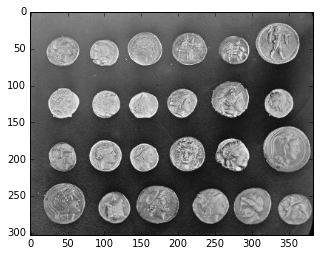

In [7]:
#plt.imshow(coins)
plt.imshow(coins,cm.gray)

In [8]:
# First we cant to try to detect edges that enclose the coins. 
# For edge detection, we use the Canny detector from skimage.feature.canny
from skimage.feature import canny
edges = canny(coins/255.)

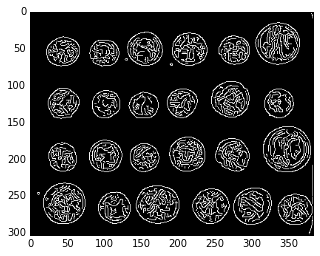

In [10]:
plt.imshow(edges,cm.gray)

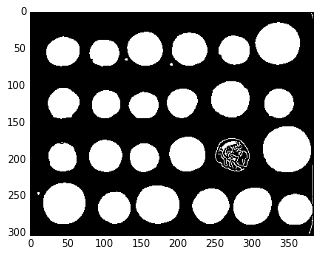

In [11]:
# As the background is smooth, almost all edges are found 
# at the boundary of the coins, or inside the coins.
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins,cm.gray)

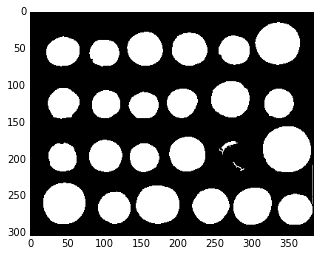

In [12]:
# Small objects from the background can be removed using ndi.label
label_objects, nb_labels = ndi.label(fill_coins)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]
plt.imshow(coins_cleaned,cm.gray)
# Note that one countour we got from Canny detector
# wasn't completely closed, so filling function didn't fill
# properly

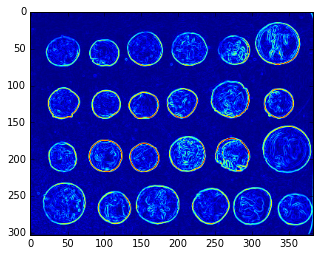

In [18]:
# Determine markers of coins vs background
# by looking at two extreme parts of histogram of grey values
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
# we then use the markers in a watershed segmentation
# The watershed transform floods an image of 
# elevation starting from markers, in order to determine 
# the catchment basins of these markers. 
# Watershed lines sparate these catchment basins and
# correspond to the desired segmentation
# The choice of the elevation map is critical for good
# segmentation. Here, the amplitude of the gradient
# provides a good elevation map. We use the Sobel operator
# for computing the amplitude of the gradient:
from skimage.filters import sobel
elevation_map = sobel(coins)
plt.imshow(elevation_map)
# How do I plot this 3D?

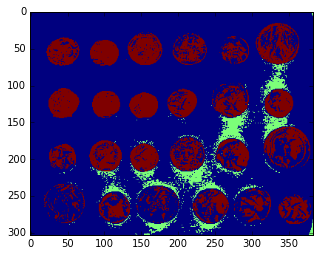

In [19]:
# Next find markers of the background and the coins based on
# the extreme parts of the histogram of grey values
plt.imshow(markers)

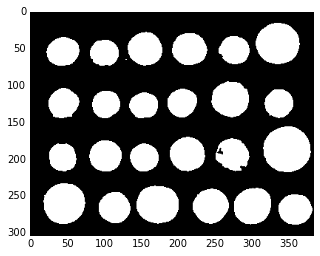

In [20]:
# Now compute the watershed transform:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation,cm.gray)

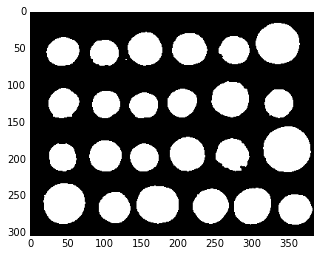

In [21]:
# Remove a few small holes with mathematical morphology
segmentation = ndi.binary_fill_holes(segmentation - 1)
plt.imshow(segmentation,cm.gray)

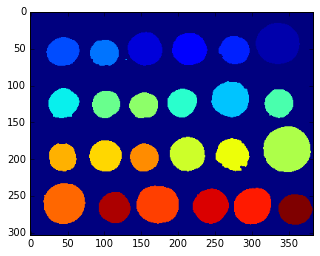

In [22]:
# We can now label all the coins one-by-one using ndi.label:
# how can I get the same pics as in the tutorial???
labeled_coins, _ = ndi.label(segmentation)
plt.imshow(labeled_coins)